In [166]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
import joblib
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler, SMOTE

In [167]:
df = pd.read_csv('anxiety.csv')
df.head()

,Q2,Q4,Q7,Q9,Q15,Q19,Q20,Q23,Q25,Q28,Q30,Q36,Q40,Q41,Classes
0,3,3,3,1,3,2,2,3,3,2,1,3,2,3,4
1,0,2,2,2,2,0,0,0,1,3,2,2,0,1,3
2,0,0,0,1,3,1,0,1,1,0,1,3,1,0,2
3,2,0,3,2,1,0,1,0,0,0,2,0,3,3,3
4,1,3,3,3,3,3,3,3,3,3,3,3,3,3,4


In [168]:
df.drop_duplicates(inplace=True)

In [169]:
X = df.drop('Classes', axis=1)
y = df.iloc[:, -1:]
print("X shape->",X.shape, "y shape->", y.shape)
y.head()

X shape-> (33281, 14) y shape-> (33281, 1)


,Classes
0,4
1,3
2,2
3,3
4,4


In [170]:
# class_mapping = {0: 'N', 1: 'M', 2: 'MD', 3: 'S', 4: 'ES'}
# y= y.replace(class_mapping)
# y.head()

In [171]:
# info_gain = mutual_info_classif(X, y)

# # Create a DataFrame to store feature names and their information gain scores
# feature_info_gain = pd.DataFrame({'Feature': X.columns, 'Information Gain': info_gain})

# # Sort features based on information gain
# feature_info_gain = feature_info_gain.sort_values(by='Information Gain', ascending=False)

# # Print information gain
# print(feature_info_gain)

# # Plot the information gain scores
# plt.figure(figsize=(10, 6))
# plt.barh(feature_info_gain['Feature'], feature_info_gain['Information Gain'], color='skyblue')
# plt.xlabel('Information Gain')
# plt.title('Feature Importance (Information Gain)')
# plt.show()

In [172]:
# X = X.drop(labels=['Q19', 'Q23', 'Q2'], axis=1)
# X = X.drop(labels=['Q2'], axis=1)
# X.head()

In [173]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [174]:
print("Before Over Sampling\n", y_train.value_counts())
sampler = RandomOverSampler()
X_train_oversampled, y_train_oversampled = sampler.fit_resample(X_train, y_train)
print("\nAfter Over Sampling\n", y_train_oversampled.value_counts())

Before Over Sampling
 Classes
4          10696
2           5496
3           4837
0           3506
1           2089
Name: count, dtype: int64

After Over Sampling
 Classes
0          10696
1          10696
2          10696
3          10696
4          10696
Name: count, dtype: int64


**Decision Tree**

In [175]:
params_dt = {'criterion': ['gini', 'entropy'],
          'max_depth': [None] + [i for i in range(1, 11)]}

In [176]:
model_dt = DecisionTreeClassifier()
grid_search_dt = GridSearchCV(estimator=model_dt, param_grid=params_dt, cv=10, scoring='accuracy')

In [177]:
grid_search_dt.fit(X_train.values, y_train.values)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
             scoring='accuracy')

In [178]:
grid_search_dt.best_params_

{'criterion': 'entropy', 'max_depth': None}

In [179]:
grid_search_dt.best_score_

0.7422262193912572

In [180]:
best_model_dt = grid_search_dt.best_estimator_
y_pred = best_model_dt.predict(X_test.values)
clf_report = classification_report(y_test, y_pred)
print(clf_report)
joblib.dump(value=best_model_dt, filename='Decision_Tree.joblib')

              precision    recall  f1-score   support

           0       0.80      0.82      0.81       906
           1       0.38      0.43      0.40       517
           2       0.65      0.64      0.65      1333
           3       0.60      0.60      0.60      1226
           4       0.92      0.90      0.91      2675

    accuracy                           0.74      6657
   macro avg       0.67      0.68      0.67      6657
weighted avg       0.75      0.74      0.75      6657



['Decision_Tree.joblib']

**Random Forest**

![Random Forest.png](<attachment:Random Forest.png>)
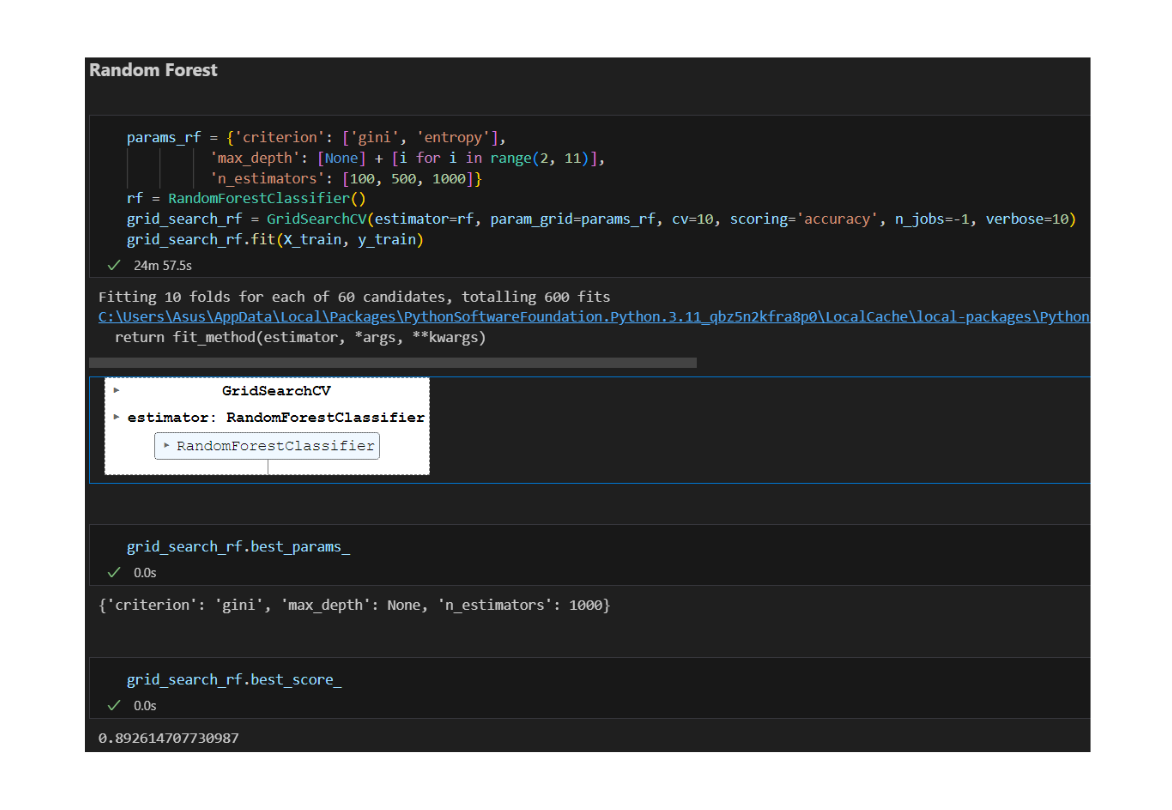

In [181]:
best_model_rf = RandomForestClassifier(criterion='gini', n_estimators=1000)
best_model_rf.fit(X_train.values, y_train.values)
y_pred_rf = best_model_rf.predict(X_test.values)
print(classification_report(y_test, y_pred_rf))
joblib.dump(value=best_model_rf, filename='Random_Forest.joblib')

C:\Users\Asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


              precision    recall  f1-score   support

           0       0.82      0.97      0.89       906
           1       0.71      0.34      0.46       517
           2       0.79      0.92      0.85      1333
           3       0.87      0.79      0.83      1226
           4       0.97      0.97      0.97      2675

    accuracy                           0.88      6657
   macro avg       0.83      0.80      0.80      6657
weighted avg       0.87      0.88      0.87      6657



['Random_Forest.joblib']

**SVM**

In [182]:
svc = SVC(probability=True)
svc.fit(X_train.values, y_train.values)
y_pred_svm = svc.predict(X_test.values)
print(classification_report(y_test, y_pred_svm))
joblib.dump(value=svc, filename='SVM.joblib')

C:\Users\Asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       906
           1       1.00      1.00      1.00       517
           2       1.00      1.00      1.00      1333
           3       1.00      1.00      1.00      1226
           4       1.00      1.00      1.00      2675

    accuracy                           1.00      6657
   macro avg       1.00      1.00      1.00      6657
weighted avg       1.00      1.00      1.00      6657



['SVM.joblib']

**MLP Classifier**

In [183]:
mlp = MLPClassifier()
mlp.fit(X_train, y_train)
y_pred_mlp = mlp.predict(X_test)
print(classification_report(y_test, y_pred_mlp))
joblib.dump(value=mlp, filename='MLP.joblib')

C:\Users\Asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1102: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       906
           1       1.00      1.00      1.00       517
           2       1.00      1.00      1.00      1333
           3       1.00      1.00      1.00      1226
           4       1.00      1.00      1.00      2675

    accuracy                           1.00      6657
   macro avg       1.00      1.00      1.00      6657
weighted avg       1.00      1.00      1.00      6657



['MLP.joblib']

**KNN**

In [184]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
print(classification_report(y_test, y_pred_knn))

C:\Users\Asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


              precision    recall  f1-score   support

           0       0.73      0.96      0.83       906
           1       0.48      0.38      0.42       517
           2       0.78      0.80      0.79      1333
           3       0.83      0.72      0.77      1226
           4       0.97      0.95      0.96      2675

    accuracy                           0.84      6657
   macro avg       0.76      0.76      0.76      6657
weighted avg       0.84      0.84      0.83      6657



**Naive Bayes**

In [185]:
gNB = GaussianNB()
gNB.fit(X_train, y_train)
y_pred_gNB = gNB.predict(X_test)
print(classification_report(y_test, y_pred_gNB))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86       906
           1       0.60      0.30      0.40       517
           2       0.73      0.87      0.79      1333
           3       0.68      0.83      0.75      1226
           4       0.99      0.87      0.93      2675

    accuracy                           0.82      6657
   macro avg       0.77      0.75      0.75      6657
weighted avg       0.83      0.82      0.82      6657



C:\Users\Asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
